# 一元线性回归与预测房价

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import math
import numpy as np
import time
import matplotlib.animation as animation

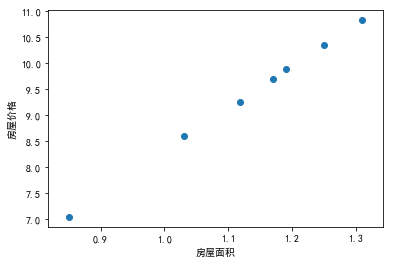

In [21]:
x = [0.85,1.03,1.118,1.17,1.19,1.25,1.309,0.92,1.08,1.15] #房屋面积，平方米/100
y = [7.05, 8.6, 9.25, 9.7, 9.88,10.35,10.82,7.65,8.95,9.55] #价格，百万
# 划分训练集和测试集
x_train = x[0:7]
y_train = y[0:7]
x_test = x[7:10]
y_test = y[7:10]
# 用散点图画出训练数据集，横轴面积，纵轴为价格
plt.scatter(x_train,y_train)
plt.xlabel('房屋面积')
plt.ylabel('房屋价格')
plt.show()

## 1、预测函数

In [10]:
def predict(x,w,b):
    yhat = w*x + b
    #print('预测的房屋售价为：%f' % yhat)
    return yhat

In [5]:
print('第一个训练样本的房屋面积为 %f平方米,实际售价为 %f万元,预测的售价为 %f万元' % (x_train[0]*100,y_train[0]*100,100*predict(x_train[0],1,0)) )

第一个训练样本的房屋面积为 85.000000平方米,实际售价为 705.000000万元,预测的售价为 85.000000万元


## 2、损失函数
### 损失函数用于评价预测函数的好坏

In [6]:
test_y = [10,10,10,10,10] #实际值
pre_1 = [6,9,10,11,14] #预测值
pre_2 = [10,1,0,10,9]
pre_3 = [8,8,8,8,8]
# 预测值-实际值
def computeLoss1(x,y):
    loss = 0
    for i in range(0,len(x)):
        loss = loss + (y[i] - x[i])
    return loss
loss1 = computeLoss1(test_y,pre_1)
loss2 = computeLoss1(test_y,pre_2)
loss3 = computeLoss1(test_y,pre_3)
print('第一种损失函数的总损失为：%f %f %f' % (loss1,loss2,loss3)) #第二组数据反而更好

# 曼哈顿距离，取绝对值
def computeLoss2(x,y):
    loss = 0
    for i in range(0,len(x)):
        loss = loss + abs(y[i] - x[i])
    return loss
loss1 = computeLoss2(test_y,pre_1)
loss2 = computeLoss2(test_y,pre_2)
loss3 = computeLoss2(test_y,pre_3)
print('第二种损失函数的总损失为：%f %f %f' % (loss1,loss2,loss3)) #1 3看不出差别

# 欧氏距离，取平方
def computeLoss3(x,y):
    loss = 0
    for i in range(0,len(x)):
        loss = loss + 1/2.0*math.pow(y[i] - x[i],2) #方便求导数约掉系数
    return loss
loss1 = computeLoss3(test_y,pre_1)
loss2 = computeLoss3(test_y,pre_2)
loss3 = computeLoss3(test_y,pre_3)
print('第三种损失函数的总损失为：%f %f %f' % (loss1,loss2,loss3)) #真实反映第三组数据更好，因为很平稳

第一种损失函数的总损失为：0.000000 -20.000000 -10.000000
第二种损失函数的总损失为：10.000000 20.000000 10.000000
第三种损失函数的总损失为：17.000000 91.000000 10.000000


## 3、线性函数的梯度下降
### 所谓梯度下降，就是让函数值下降为0的过程，在线性函数中，让函数沿斜率方向变化，可以使函数值下降为0
### 当斜率为正，x减小，函数值下降；当斜率为负，x增大，函数值下降

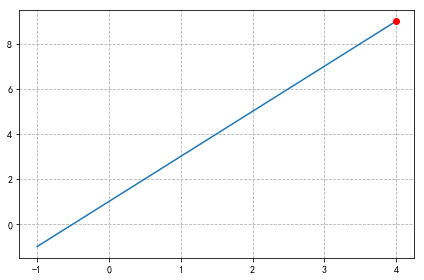

In [11]:
def linear1(x):
    y = 2*x+1
    return y
def linear2(x):
    y = -9*x-8
    return y
st_x = []
st_y = []
def update_points(num):
    '''
    更新数据点
    '''
    point_ani.set_data(st_x[num], st_y[num])
    return point_ani,
x = 5
ratio = (linear1(3)-linear1(3.01))/(3-3.01) #计算斜率
while(linear1(x)>0):
    x = x - 1
    st_x.append(x)
    st_y.append(linear1(x))
st_x = np.array(st_x)
st_y = np.array(st_y)
fig = plt.figure(tight_layout=True)
plt.plot(st_x,st_y)
point_ani, = plt.plot(st_x[0], st_y[0], "ro")
plt.grid(ls="--")
# 开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0,len(st_x)), interval=1000, blit=True,repeat=False)
plt.show()
    

## 4、非线性函数的梯度下降

当前变量t=-3.500000  函数值s=12.250000
当前变量t=-3.000000  函数值s=9.000000
当前变量t=-2.500000  函数值s=6.250000
当前变量t=-2.000000  函数值s=4.000000
当前变量t=-1.500000  函数值s=2.250000
当前变量t=-1.000000  函数值s=1.000000
当前变量t=-0.500000  函数值s=0.250000
当前变量t=0.000000  函数值s=0.000000


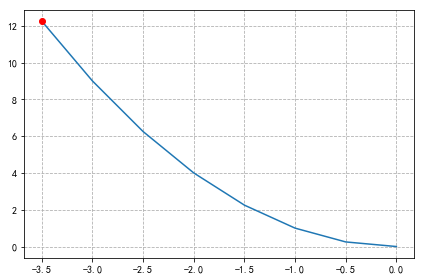

In [7]:
def nonlinear(t):
    s=t*t
    return s

def train(t,lr):
    steps = 0
    points_x = []
    points_y = []
    def update_points(num):
        point_ani.set_data(points_x[num], points_y[num])
        return point_ani,
    points_x.append(t)
    points_y.append(nonlinear(t))
    print("当前变量t=%f  函数值s=%f" %(t, nonlinear(t)))
    while(nonlinear(t) > 0 and steps < 100): #梯度下降法，让函数值减为0
        derivative=2*t   #计算导数值
        if(derivative>0):
            t=t-lr
        else:
            t=t+lr  #更新变量
        print("当前变量t=%f  函数值s=%f" %(t, nonlinear(t)))
        points_x.append(t)
        points_y.append(nonlinear(t))
        steps += 1
    # 画出二次函数背景
    x = np.linspace(-5, 5, 100)
    y = x * x
    fig = plt.figure(tight_layout=True)
    plt.plot(x,y)
    
    point_ani, = plt.plot(points_x[0], points_y[0], "ro")
    plt.grid(ls="--")
    # 开始制作动画
    ani = animation.FuncAnimation(fig, update_points, np.arange(0,len(points_x)), interval=1000, blit=True)
    plt.show()

train(-3.5,0.5) #下降起点 下降步长

### 下降起点和步长设置，导致的梯度无法下降为0的问题

In [ ]:
train(4.8,0.5)

### 修正的非线性函数梯度下降，学习步长改为超参数（系数）*导数

当前训练0 步数当前变量t=-4.800000  函数值s=23.040000
当前训练0 当前变量t=-0.960000  函数值s=0.921600
当前训练1 当前变量t=-0.192000  函数值s=0.036864
当前训练2 当前变量t=-0.038400  函数值s=0.001475
当前训练3 当前变量t=-0.007680  函数值s=0.000059
当前训练4 当前变量t=-0.001536  函数值s=0.000002


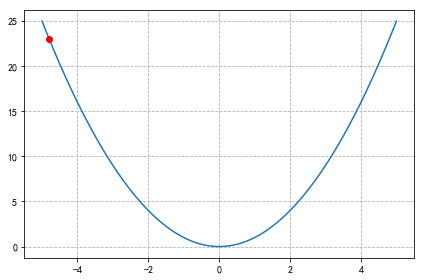

In [6]:
def nonlinear(t):
    s=t*t
    return s

def train(a):
    steps = 0
    points_x = []
    points_y = []
    def update_points(num):
        point_ani.set_data(points_x[num], points_y[num])
        return point_ani,
    points_x.append(t)
    points_y.append(nonlinear(t))
    print("当前训练%d 当前变量t=%f  函数值s=%f" %(steps,t, nonlinear(t)))
    while(nonlinear(t) > 1e-5 and steps < 100): #梯度下降法，让函数值减到约为0
        derivative=2*t   #计算导数值
        t=t-a*derivative
        print("当前训练%d 当前变量t=%f  函数值s=%f" %(steps,t, nonlinear(t)))
        points_x.append(t)
        points_y.append(nonlinear(t))
        steps += 1
    # 画出二次函数背景
    x = np.linspace(-5, 5, 100)
    y = x * x
    fig = plt.figure(tight_layout=True)
    plt.plot(x,y)
    
    point_ani, = plt.plot(points_x[0], points_y[0], "ro")
    plt.grid(ls="--")
    # 开始制作动画
    ani = animation.FuncAnimation(fig, update_points, np.arange(0,len(points_x)), interval=1000, blit=True)
    plt.show()

train(-4.8,0.4)

## 5、偏导数与2个变量的函数梯度下降

In [17]:
# 计算样本的总损失，欧氏距离
def computeLoss(w, b):
    loss = 0
    for i in range(0,len(x_train)):
        diff = predict(x_train[i],w,b) - y_train[i]
        loss = loss + 1/2*math.pow(diff, 2) 
    return loss/len(x_train)

# 计算w和b的偏导数
def computeGrad(w,b):
    wder = 0
    bder = 0
    m = len(x_train)
    for i in range(0,len(x_train)):
        yhat = predict(x_train[i],w,b)
        wder = wder + (yhat - y_train[i])*x_train[i] #1/2(yhat-y)^2对w求导
        bder = bder + (yhat - y_train[i])#1/2(yhat-y)^2对b求导
    return wder/m, bder/m

def train(a,w,b):
    loss = 0
    steps = 0
    loss = computeLoss(w,b)
    print("当前训练第%d步 当前w=%f b=%f  损失=%f" %(steps,w, b,loss))
    while(loss > 1e-3 and steps < 10000): #梯度下降法，让损失减到约为0
        steps += 1
        wder,bder = computeGrad(w,b)
        w=w-a*wder
        b=b-a*bder
        loss = computeLoss(w,b)
        print("当前训练第%d步 当前w=%f b=%f  损失=%f" %(steps,w, b,loss))       

train(0.4,1,0)

当前训练第0步 当前w=1.000000 b=0.000000  损失=32.746777
当前训练第1步 当前w=4.590325 b=3.214800  损失=0.491100
当前训练第2步 当前w=4.997786 b=3.562022  损失=0.092845
当前训练第3步 当前w=5.051791 b=3.590855  损失=0.087399
当前训练第4步 当前w=5.066521 b=3.584364  损失=0.086801
当前训练第5步 当前w=5.076863 b=3.573980  损失=0.086265
当前训练第6步 当前w=5.086690 b=3.563194  损失=0.085734
当前训练第7步 当前w=5.096433 b=3.552393  损失=0.085206
当前训练第8步 当前w=5.106140 b=3.541621  损失=0.084681
当前训练第9步 当前w=5.115817 b=3.530881  损失=0.084159
当前训练第10步 当前w=5.125463 b=3.520174  损失=0.083641
当前训练第11步 当前w=5.135080 b=3.509500  损失=0.083126
当前训练第12步 当前w=5.144667 b=3.498860  损失=0.082614
当前训练第13步 当前w=5.154224 b=3.488252  损失=0.082105
当前训练第14步 当前w=5.163751 b=3.477677  损失=0.081599
当前训练第15步 当前w=5.173249 b=3.467135  损失=0.081096
当前训练第16步 当前w=5.182718 b=3.456626  损失=0.080597
当前训练第17步 当前w=5.192157 b=3.446149  损失=0.080101
当前训练第18步 当前w=5.201567 b=3.435704  损失=0.079607
当前训练第19步 当前w=5.210948 b=3.425292  损失=0.079117
当前训练第20步 当前w=5.220300 b=3.414912  损失=0.078630
当前训练第21步 当前w=5.229623 b=3.404564  损失=0.0781

## 6、房价预测

In [22]:
# 计算样本的总损失，欧氏距离
def computeLoss(w, b):
    loss = 0
    for i in range(0,len(x_train)):
        diff = predict(x_train[i],w,b) - y_train[i]
        loss = loss + 1/2*math.pow(diff, 2) 
    return loss/len(x_train)

# 计算w和b的偏导数
def computeGrad(w,b):
    wder = 0
    bder = 0
    m = len(x_train)
    for i in range(0,len(x_train)):
        yhat = predict(x_train[i],w,b)
        wder = wder + (yhat - y_train[i])*x_train[i] #1/2(yhat-y)^2对w求导
        bder = bder + (yhat - y_train[i])#1/2(yhat-y)^2对b求导
    return wder/m, bder/m
w_points=[]
b_points=[]
def train(a,w,b):
    loss = 0
    def animate(i):   
        line.set_data( w_points[i],b_points[i])
        return line,
    steps = 0
    loss = computeLoss(w,b)
    w_points.append(w)
    b_points.append(b)
    print("当前训练第%d步 当前w=%f b=%f  损失=%f" %(steps,w, b,loss))
    while(loss > 1e-3 and steps < 10000): #梯度下降法，让损失减到约为0
        steps += 1
        wder,bder = computeGrad(w,b)
        w=w-a*wder
        b=b-a*bder
        loss = computeLoss(w,b)
        w_points.append(w)
        b_points.append(b)
        print("当前训练第%d步 当前w=%f b=%f  损失=%f" %(steps,w, b,loss))
    return w,b
w,b=train(0.4,1,0)
#print(w,b)

# animation
# Code courtesy: http://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
fig, ax = plt.subplots(figsize=(4, 3))
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.

ax.scatter(x_train, y_train, color='grey', alpha=0.8, s=1)

# Initial line
line, = ax.plot(x_train, x_train*1.0+0, 'r-', linewidth=1)
def update(i):
    label = 'Iteration {0}'.format(i)
    line.set_ydata(x_train*w_points[i]+b_points[i])
    ax.set_xlabel(label)
    return line, ax
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, len(w_points)), interval=1)
plt.show()

for i in range(0,len(x_test)):
    yhat = predict(x_test[i],w,b)
    print("第%d个样本的预测结果为：%.2f,实际为：%.2f" % (i+8,yhat,y_test[i]))
print("老王120平米房子的预测售价是: %.2f" % predict(1.2,w,b))


当前训练第0步 当前w=1.000000 b=0.000000  损失=34.530032
当前训练第1步 当前w=4.788844 b=3.299029  损失=0.336573
当前训练第2步 当前w=5.116242 b=3.564373  损失=0.095668
当前训练第3步 当前w=5.153458 b=3.575464  损失=0.093326
当前训练第4步 当前w=5.166316 b=3.565283  损失=0.092665
当前训练第5步 当前w=5.177098 b=3.553357  损失=0.092020
当前训练第6步 当前w=5.187672 b=3.541324  损失=0.091379
当前训练第7步 当前w=5.198195 b=3.529320  损失=0.090743
当前训练第8步 当前w=5.208680 b=3.517357  损失=0.090112
当前训练第9步 当前w=5.219128 b=3.505436  损失=0.089485
当前训练第10步 当前w=5.229539 b=3.493557  损失=0.088862
当前训练第11步 当前w=5.239914 b=3.481719  损失=0.088244
当前训练第12步 当前w=5.250253 b=3.469923  损失=0.087630
当前训练第13步 当前w=5.260556 b=3.458168  损失=0.087020
当前训练第14步 当前w=5.270822 b=3.446454  损失=0.086414
当前训练第15步 当前w=5.281053 b=3.434781  损失=0.085813
当前训练第16步 当前w=5.291248 b=3.423149  损失=0.085216
当前训练第17步 当前w=5.301407 b=3.411557  损失=0.084623
当前训练第18步 当前w=5.311531 b=3.400006  损失=0.084034
当前训练第19步 当前w=5.321620 b=3.388495  损失=0.083450
当前训练第20步 当前w=5.331673 b=3.377025  损失=0.082869
当前训练第21步 当前w=5.341691 b=3.365595  损失=0.0822